<a href="https://colab.research.google.com/github/Hiranmai-T/EVA/blob/master/Assignment5/EVA4_Assignment5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, 3,bias=False) #input -? OUtput? RF
#         self.batch1 = nn.BatchNorm2d(16)
#         self.drop1 = nn.Dropout2d(0.1)

#         self.conv2 = nn.Conv2d(16, 32, 3,bias=False)
#         self.batch2 = nn.BatchNorm2d(32)
#         self.drop2 = nn.Dropout2d(0.1)

#         self.conv3 = nn.Conv2d(32, 10, 1,bias=False)
#         self.pool1 = nn.MaxPool2d(2, 2)

#         self.conv4 = nn.Conv2d(10, 16, 3,bias=False) #input -? OUtput? RF
#         self.batch3 = nn.BatchNorm2d(16)
#         self.drop3 = nn.Dropout2d(0.1)

#         self.conv5 = nn.Conv2d(16, 16, 3,bias=False) #input -? OUtput? RF
#         self.batch4 = nn.BatchNorm2d(16)
#         self.drop4 = nn.Dropout2d(0.1)

#         self.conv6 = nn.Conv2d(16, 16, 3,bias=False) #input -? OUtput? RF
#         self.batch5 = nn.BatchNorm2d(16)
#         self.drop5 = nn.Dropout2d(0.1)

#         #self.conv7 = nn.Conv2d(16, 16, 3) #input -? OUtput? RF
#         #self.batch6 = nn.BatchNorm2d(16)
#         #self.drop6 = nn.Dropout2d(0.1)

#         self.avgpool1 = nn.AvgPool2d(6,1)
#         self.conv8 = nn.Conv2d(16, 10, 1,bias=False)



#     def forward(self, x):
#         # x = self.pool1(F.relu(self.conv2(self.batch1(F.relu(self.conv1(x))))))
#         # x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
#         # x = F.relu(self.conv6(F.relu(self.conv5(x))))
#         # x = self.conv7(x)
#         x = F.relu(self.drop1(self.batch1(F.relu(self.conv1(x)))))
#         x = F.relu(self.pool1(F.relu(self.conv3(self.drop2(self.batch2(F.relu(self.conv2(x))))))))
#         x = F.relu(self.drop3(self.batch3(F.relu(self.conv4(x)))))
#         x = F.relu(self.drop4(self.batch4(F.relu(self.conv5(x)))))
#         x = F.relu(self.drop5(self.batch5(F.relu(self.conv6(x)))))
#         #x = self.conv8(self.avgpool1((self.drop6(self.batch6(F.relu(self.conv7(x)))))))
#         x = self.conv8(self.avgpool1(x))
#         #x = F.relu(self.conv8(F.relu(self.conv7(x))))
#         #x = self.drop7(self.batch7(self.conv9(x)))
#         #x = self.conv9(x)
#         x = x.view(-1, 10)
#         return F.log_softmax(x)

In [0]:
import torch.nn.functional as F
dropout_value = 0.1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 24
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) # output_size = 10
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 8
        self.pool2 = nn.MaxPool2d(2, 2)
        self.convblock9 = nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        # self.convblock7 = nn.Sequential(
        #     nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
        #     nn.ReLU(),            
        #     nn.BatchNorm2d(16),
        #     nn.Dropout(dropout_value)
        # ) # output_size = 6
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.convblock8 = nn.Sequential(
            #nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 

        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        #x = self.pool2(x)
        #x = self.convblock9(x)
        x = self.convblock6(x)
        #x = self.convblock7(x)
        x = self.gap(x)        
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [4]:

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             256
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 10, 10, 10]             720
             ReLU-12           [-1, 10, 10, 10]               0
      BatchNorm2d-13           [-1, 10, 10, 10]              20
          Dropout-14           [-1, 10,

In [5]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        
                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,)),
                        #transforms.RandomErasing()
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)



Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [7]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
#scheduler = MultiStepLR(optimizer, [], gamma=0.1, last_epoch=-1)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
#                                                      patience=3, 
#                                                      verbose=0, 
#                                                      factor=0.5, 
#                                                      min_lr=0.00001)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.13891910016536713 Batch_id=468 Accuracy=84.83: 100%|██████████| 469/469 [00:13<00:00, 34.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1420, Accuracy: 9554/10000 (95.54%)

EPOCH: 1


Loss=0.13259409368038177 Batch_id=468 Accuracy=94.68: 100%|██████████| 469/469 [00:13<00:00, 33.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1239, Accuracy: 9625/10000 (96.25%)

EPOCH: 2


Loss=0.09278871864080429 Batch_id=468 Accuracy=95.64: 100%|██████████| 469/469 [00:13<00:00, 37.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0853, Accuracy: 9728/10000 (97.28%)

EPOCH: 3


Loss=0.148584246635437 Batch_id=468 Accuracy=96.16: 100%|██████████| 469/469 [00:13<00:00, 35.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0714, Accuracy: 9761/10000 (97.61%)

EPOCH: 4


Loss=0.19423536956310272 Batch_id=468 Accuracy=96.33: 100%|██████████| 469/469 [00:14<00:00, 33.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0694, Accuracy: 9776/10000 (97.76%)

EPOCH: 5


Loss=0.16592937707901 Batch_id=468 Accuracy=96.50: 100%|██████████| 469/469 [00:13<00:00, 36.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0699, Accuracy: 9777/10000 (97.77%)

EPOCH: 6


Loss=0.09918597340583801 Batch_id=468 Accuracy=96.67: 100%|██████████| 469/469 [00:13<00:00, 33.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0622, Accuracy: 9795/10000 (97.95%)

EPOCH: 7


Loss=0.17499013245105743 Batch_id=468 Accuracy=96.79: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0684, Accuracy: 9768/10000 (97.68%)

EPOCH: 8


Loss=0.0640009269118309 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:14<00:00, 32.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0602, Accuracy: 9804/10000 (98.04%)

EPOCH: 9


Loss=0.046651776880025864 Batch_id=468 Accuracy=96.85: 100%|██████████| 469/469 [00:13<00:00, 33.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0664, Accuracy: 9793/10000 (97.93%)

EPOCH: 10


Loss=0.023264527320861816 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:14<00:00, 33.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0610, Accuracy: 9794/10000 (97.94%)

EPOCH: 11


Loss=0.09902941435575485 Batch_id=468 Accuracy=97.08: 100%|██████████| 469/469 [00:13<00:00, 34.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0551, Accuracy: 9809/10000 (98.09%)

EPOCH: 12


Loss=0.02799469232559204 Batch_id=468 Accuracy=97.07: 100%|██████████| 469/469 [00:14<00:00, 31.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0557, Accuracy: 9818/10000 (98.18%)

EPOCH: 13


Loss=0.04947296902537346 Batch_id=468 Accuracy=97.20: 100%|██████████| 469/469 [00:13<00:00, 34.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0579, Accuracy: 9812/10000 (98.12%)

EPOCH: 14


Loss=0.03504057228565216 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:14<00:00, 33.44it/s]



Test set: Average loss: 0.0601, Accuracy: 9805/10000 (98.05%)



Text(0.5, 1.0, 'Test Accuracy')

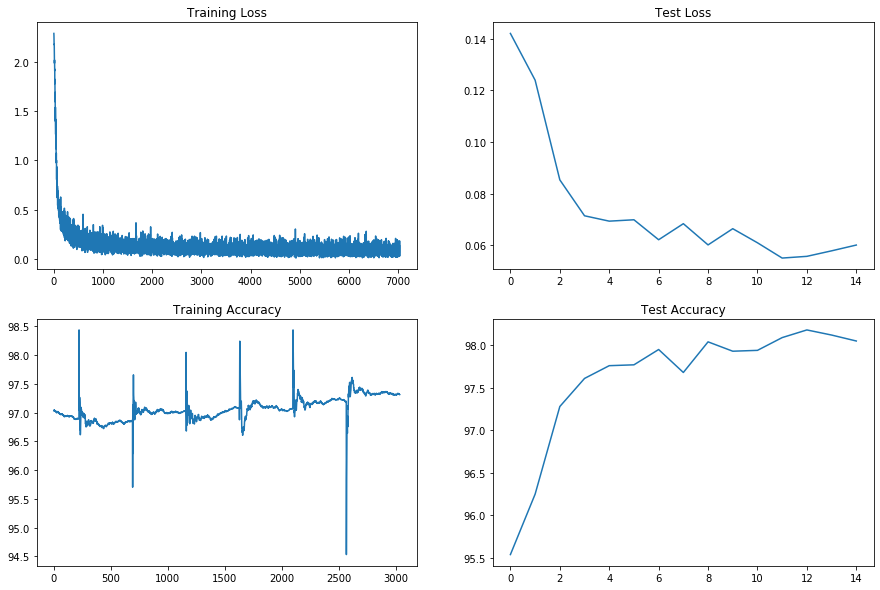

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")